## Dataset

This dataset is about **Global Temperatures**. Data was collected by Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. 

The dataset contains over 8 million rows and 7 columns and describes temperatures in more than 3000 cities from 1743 to 2013. Below are listed the different variables.
 - dt: date (year, month, day)
 - Average Temperature
 - Average Temperature Uncertainty
 - City
 - Country
 - Latitude
 - Longitude

Global warming is one of the major challenges humanity will have to face this century. Earth's temperature has increased by 0.08° Celsius per decade since 1880, but the rate of warming is accelerating: since 1981 temperatures have increased by 0.18°C per decade. Furthermore, 2021 was the sixth warmest year on record based on NOAA temperature data *(source: climate.gov)*. Hence, it is interesting to explore this dataset as it will allow us to visualize clearly how global warming manifests itself.

**Data source**: https://www.kaggle.com/code/pjmcintyre/global-warming-visualisation/data?select=GlobalLandTemperaturesByCity.csv

**Additional source**: https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature

## Preliminary inspection

Let's have a quick look at the data

In [165]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [166]:
#Loading dataset and converting it to a dataframe

a = pd.read_csv('/Users/akher/Downloads/GlobalLandTemperaturesByCity.csv')
data = pd.DataFrame(a, index=None)

data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [167]:
#Getting overview statistics

data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [168]:
#Checking number of rows and columns

data.shape

(8599212, 7)

In [169]:
#Checking variable types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [170]:
#Let's look at the number of unique values in each column

dt_count = data['dt'].unique().size
print("Date unique values count : "+ str(dt_count))

temp_count = data['AverageTemperature'].unique().size
print("Average temperature unique values count : "+ str(temp_count))

tempu_count = data['AverageTemperatureUncertainty'].unique().size
print("Average temperature uncertainty unique values count : "+ str(tempu_count))

city_count = data['City'].unique().size
print("City unique values count : "+ str(city_count))

country_count = data['Country'].unique().size
print("Country unique values count : "+ str(country_count))

lat_count = data['Latitude'].unique().size
print("Latitude unique values count : "+ str(lat_count))

lon_count = data['Longitude'].unique().size
print("Longitude unique values count : "+ str(lon_count))

Date unique values count : 3239
Average temperature unique values count : 103482
Average temperature uncertainty unique values count : 10903
City unique values count : 3448
Country unique values count : 159
Latitude unique values count : 73
Longitude unique values count : 1227


In [171]:
#List of the countries included in the dataset

print(data['Country'].unique())

['Denmark' 'Turkey' 'Kazakhstan' 'China' 'Spain' 'Germany' 'Nigeria'
 'Iran' 'Russia' 'Canada' "Côte D'Ivoire" 'United Kingdom' 'Saudi Arabia'
 'Japan' 'United States' 'India' 'Benin' 'United Arab Emirates' 'Mexico'
 'Venezuela' 'Ghana' 'Ethiopia' 'Australia' 'Yemen' 'Indonesia' 'Morocco'
 'Pakistan' 'France' 'Libya' 'Burma' 'Brazil' 'South Africa' 'Syria'
 'Egypt' 'Algeria' 'Netherlands' 'Malaysia' 'Portugal' 'Ecuador' 'Italy'
 'Uzbekistan' 'Philippines' 'Madagascar' 'Chile' 'Belgium' 'El Salvador'
 'Romania' 'Peru' 'Colombia' 'Tanzania' 'Tunisia' 'Turkmenistan' 'Israel'
 'Eritrea' 'Paraguay' 'Greece' 'New Zealand' 'Vietnam' 'Cameroon' 'Iraq'
 'Afghanistan' 'Argentina' 'Azerbaijan' 'Moldova' 'Mali'
 'Congo (Democratic Republic Of The)' 'Thailand'
 'Central African Republic' 'Bosnia And Herzegovina' 'Bangladesh'
 'Switzerland' 'Equatorial Guinea' 'Cuba' 'Lebanon' 'Mozambique' 'Serbia'
 'Angola' 'Somalia' 'Norway' 'Nepal' 'Poland' 'Ukraine' 'Guinea Bissau'
 'Malawi' 'Burkina Faso' 'Slov

<AxesSubplot:>

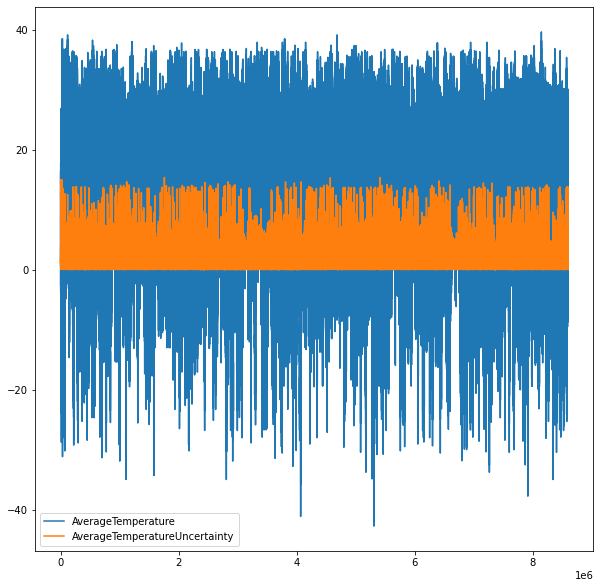

In [172]:
#Plotting the data

data.plot(figsize=(10,10))

## Changing data types

By looking at the data we have noticed that date, latitude and longitude are considered as objects. For the purpose of our analysis, we want it to be integers or floats. Moreover, we observe that there are null values, which we will deal with later.

In [173]:
#Convert latitude and longitude to float

data['Latitude'] = data['Latitude'].str[:-1].astype(float)
data['Longitude'] = data['Longitude'].str[:-1].astype(float)

data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05,10.33
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05,10.33
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05,10.33
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05,10.33
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05,10.33


In [174]:
#Convert date to integer

data['Year'] = pd.DatetimeIndex(data['dt']).year
data['Month'] = pd.DatetimeIndex(data['dt']).month
data = data.drop(['dt'], axis=1)

data.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
0,6.068,1.737,Århus,Denmark,57.05,10.33,1743,11
1,NaN,NaN,Århus,Denmark,57.05,10.33,1743,12
2,NaN,NaN,Århus,Denmark,57.05,10.33,1744,1
3,NaN,NaN,Århus,Denmark,57.05,10.33,1744,2
4,NaN,NaN,Århus,Denmark,57.05,10.33,1744,3


In [175]:
#Checking variables have the right type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 8 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   AverageTemperature             float64
 1   AverageTemperatureUncertainty  float64
 2   City                           object 
 3   Country                        object 
 4   Latitude                       float64
 5   Longitude                      float64
 6   Year                           int64  
 7   Month                          int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 524.9+ MB


## Treating null values

We observed that we have a lot of null values just by looking at the five first rows of our data. We also noticed that we have temperature values for each month per city. For the purpose of our analysis, we will use the average temperature per year and get rid of the 'month' column. When doing this, we will get rid of a good number of null values.

In [176]:
#Calculating average temperature per year per country and removing 'month' column

df = data.groupby(['Country', 'City','Year', 'Latitude', 'Longitude'], as_index=False)['AverageTemperature','AverageTemperatureUncertainty'].aggregate('mean')

df.head()

/var/folders/93/nf_c1qz16mq6q1czqlzt8qv00000gn/T/ipykernel_90921/3288277406.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(['Country', 'City','Year', 'Latitude', 'Longitude'], as_index=False)['AverageTemperature','AverageTemperatureUncertainty'].aggregate('mean')


,Country,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,Baglan,1833,36.17,69.61,10.404000,2.201917
1,Afghanistan,Baglan,1834,36.17,69.61,10.404000,2.176583
2,Afghanistan,Baglan,1835,36.17,69.61,11.521167,1.914000
3,Afghanistan,Baglan,1836,36.17,69.61,NaN,NaN
4,Afghanistan,Baglan,1837,36.17,69.61,12.209833,2.127667


In [177]:
#Checking data for Denmark

df.loc[df['Country'] == 'Denmark']

,Country,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
173667,Denmark,Aalborg,1743,57.05,10.33,6.068000,1.737000
173668,Denmark,Aalborg,1744,57.05,10.33,9.007125,1.724000
173669,Denmark,Aalborg,1745,57.05,10.33,0.026500,1.306500
173670,Denmark,Aalborg,1746,57.05,10.33,NaN,NaN
173671,Denmark,Aalborg,1747,57.05,10.33,NaN,NaN
...,...,...,...,...,...,...,...
174746,Denmark,Århus,2009,57.05,10.33,8.938667,0.233000
174747,Denmark,Århus,2010,57.05,10.33,6.965000,0.281917
174748,Denmark,Århus,2011,57.05,10.33,9.181167,0.323000
174749,Denmark,Århus,2012,57.05,10.33,8.399833,0.326083


We can see that there are still null values. Let's check how much and deal with it. 

In [178]:
#Check number of rows

df.shape

(718331, 7)

In [179]:
#Check number of null values

df.isnull().sum().sum()

50164

In [180]:
#Check number of rows with null values

nan_rows = df[df.isnull().T.any()]

nan_rows

,Country,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
3,Afghanistan,Baglan,1836,36.17,69.61,NaN,NaN
184,Afghanistan,Gardez,1836,32.95,69.89,NaN,NaN
187,Afghanistan,Gardez,1839,32.95,69.89,NaN,NaN
206,Afghanistan,Gardez,1858,32.95,69.89,NaN,NaN
207,Afghanistan,Gardez,1859,32.95,69.89,NaN,NaN
...,...,...,...,...,...,...,...
718187,Zimbabwe,Mutare,1870,18.48,32.11,NaN,NaN
718188,Zimbabwe,Mutare,1871,18.48,32.11,NaN,NaN
718189,Zimbabwe,Mutare,1872,18.48,32.11,NaN,NaN
718190,Zimbabwe,Mutare,1873,18.48,32.11,NaN,NaN


There are 718,331 rows in our dataframe. Within this dataframe there are 25,082 rows containing null values. This correponds to 3% of rows. Therefore, we will delete these rows. There should be 693,249 rows left in our dataframe.

In [181]:
#Deleting rows 

df = df.dropna()

df

,Country,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,Baglan,1833,36.17,69.61,10.404000,2.201917
1,Afghanistan,Baglan,1834,36.17,69.61,10.404000,2.176583
2,Afghanistan,Baglan,1835,36.17,69.61,11.521167,1.914000
4,Afghanistan,Baglan,1837,36.17,69.61,12.209833,2.127667
5,Afghanistan,Baglan,1838,36.17,69.61,9.649500,2.286833
...,...,...,...,...,...,...,...
718326,Zimbabwe,Mutare,2009,18.48,32.11,18.938667,0.537333
718327,Zimbabwe,Mutare,2010,18.48,32.11,19.515833,0.442333
718328,Zimbabwe,Mutare,2011,18.48,32.11,19.200583,0.502250
718329,Zimbabwe,Mutare,2012,18.48,32.11,18.874583,0.634417


## Checking and cleaning the rest of the data

Now that we removed the null values, we will check if the rest of the data makes sense. We will check the following:
 - Year goes from 1743 to 2013
 - Latitude values are between -90 and 90
 - Longitude values are between -180 and 180
 - Average temperature is between -20 and 50
 - Maximum average temperature uncertainty is lower than 5

In [182]:
#Checking min and max values for each variable

ymin = df['Year'].min()
ymax = df['Year'].max()
print("Minimun year is : "+ str(ymin), " Maximum year is : "+str(ymax))

lamin = df['Latitude'].min()
lamax = df['Latitude'].max()
print("Minimun latitude is : "+ str(lamin), " Maximum latitude is : "+str(lamax))

lomin = df['Longitude'].min()
lomax = df['Longitude'].max()
print("Minimun longitude is : "+ str(lomin), " Maximum longitude is : "+str(lomax))

tmin = df['AverageTemperature'].min()
tmax = df['AverageTemperature'].max()
print("Minimun average temperature is : "+ str(tmin), " Maximum average temperature is : "+str(tmax))

tumin = df['AverageTemperatureUncertainty'].min()
tumax = df['AverageTemperatureUncertainty'].max()
print("Minimun average temperature uncertainty is : "+ str(tumin), " Maximum average temperature uncertainty is : "+str(tumax))

Minimun year is : 1743  Maximum year is : 2013
Minimun latitude is : 0.8  Maximum latitude is : 69.92
Minimun longitude is : 0.0  Maximum longitude is : 176.95
Minimun average temperature is : -22.881  Maximum average temperature is : 32.876999999999995
Minimun average temperature uncertainty is : 0.13808333333333334  Maximum average temperature uncertainty is : 7.330583333333333


Year, latitude and longitude values look coherent. However, minimum average temperature seems low and maximum average temperature uncertainty looks high. Let's have a closer look at it.

In [183]:
#Checking temperature values

df.sort_values(by='AverageTemperature', ascending=True)

,Country,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
533625,Russia,Nizhnevartovsk,1812,60.27,77.84,-22.881000,3.418000
533628,Russia,Nizhnevartovsk,1815,60.27,77.84,-17.833000,3.289000
81421,Canada,Winnipeg,1819,50.63,97.61,-17.530667,3.911667
79448,Canada,Saskatoon,1819,52.24,107.74,-16.265333,4.038333
79202,Canada,Regina,1819,50.63,105.21,-14.933333,3.934667
...,...,...,...,...,...,...,...
263335,India,Guna,1861,24.92,78.03,32.333000,2.156000
273005,India,Jhansi,1861,24.92,78.03,32.333000,2.156000
280575,India,Lalitpur,1861,24.92,78.03,32.333000,2.156000
342404,Iran,Abadan,1820,29.74,48.00,32.877000,1.752000


In [184]:
#Checking temperature uncertainty values

dfu = df.sort_values(by='AverageTemperatureUncertainty', ascending=False)

dfu.head(100)

,Country,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
444123,Netherlands,Almere,1758,52.24,5.26,8.790167,7.330583
444665,Netherlands,Amsterdam,1758,52.24,5.26,8.790167,7.330583
449543,Netherlands,Utrecht,1758,52.24,5.26,8.790167,7.330583
448459,Netherlands,Nijmegen,1758,52.24,5.26,8.790167,7.330583
445749,Netherlands,Dordrecht,1758,52.24,5.26,8.790167,7.330583
...,...,...,...,...,...,...,...
173954,Denmark,Copenhagen,1759,55.45,11.34,8.284750,7.023750
210480,Germany,Lübeck,1759,53.84,9.55,8.692833,7.008833
206144,Germany,Hamburg,1759,53.84,9.55,8.692833,7.008833
200453,Germany,Bremerhaven,1759,53.84,9.55,8.692833,7.008833


The lowest temperature is -22 degrees in 1812 in Russia. The value makes sense as Nizhnevartovsk is a northern city. However, when looking at 'AverageTemperatureUncertainty', we can see that there are more than a 100 values that are above 7 (and therefore above 5). Let's have a deeper look at this.

In [185]:
#Find the number of values higher than 5 in average temperature uncertainty

df['AverageTemperatureUncertainty'][df['AverageTemperatureUncertainty'] > 5].count()

5198

In [186]:
#Removing the values

df = df[df['AverageTemperatureUncertainty'] < 5]
df

,Country,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,Baglan,1833,36.17,69.61,10.404000,2.201917
1,Afghanistan,Baglan,1834,36.17,69.61,10.404000,2.176583
2,Afghanistan,Baglan,1835,36.17,69.61,11.521167,1.914000
4,Afghanistan,Baglan,1837,36.17,69.61,12.209833,2.127667
5,Afghanistan,Baglan,1838,36.17,69.61,9.649500,2.286833
...,...,...,...,...,...,...,...
718326,Zimbabwe,Mutare,2009,18.48,32.11,18.938667,0.537333
718327,Zimbabwe,Mutare,2010,18.48,32.11,19.515833,0.442333
718328,Zimbabwe,Mutare,2011,18.48,32.11,19.200583,0.502250
718329,Zimbabwe,Mutare,2012,18.48,32.11,18.874583,0.634417


## Overview statistics and plots

Now that the data is cleaned, let's analyse and visualize it quickly.

In [187]:
# What is the mean?

tmean = df['AverageTemperature'].mean()
tmean

16.77785040825992

In [188]:
# What is the median?

df['AverageTemperature'].median()

16.818166666666666

In [189]:
# What is the mode?

df['AverageTemperature'].mode()

0    12.1885
Name: AverageTemperature, dtype: float64

In [190]:
#Some more overview stats

df['AverageTemperature'].describe()

count    688051.000000
mean         16.777850
std           7.903222
min         -22.881000
25%           9.945917
50%          16.818167
75%          24.783000
max          32.877000
Name: AverageTemperature, dtype: float64

In [191]:
#Coefficient of variation

tstd = df['AverageTemperature'].std()
var = tstd/tmean
var

0.47105090823275425

We can see that the mean is almost equal to the median which means that data distribution is almost symmetrical. However, the standard deviation and coefficient of variation shows that data is quite spread out.

<AxesSubplot:ylabel='Frequency'>

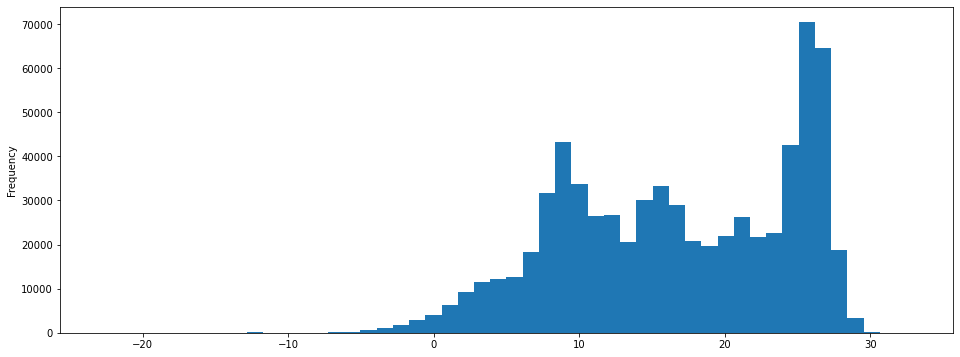

In [192]:
#Average temperature histogram

df['AverageTemperature'].plot.hist(bins=50)

## Correlation matrix

In [193]:
#Correlation matrix

df.corr()

,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
Year,1.000000,-0.223418,0.155114,0.214467,-0.860435
Latitude,-0.223418,1.000000,-0.272754,-0.884077,0.246876
Longitude,0.155114,-0.272754,1.000000,0.174380,-0.197048
AverageTemperature,0.214467,-0.884077,0.174380,1.000000,-0.237647
AverageTemperatureUncertainty,-0.860435,0.246876,-0.197048,-0.237647,1.000000


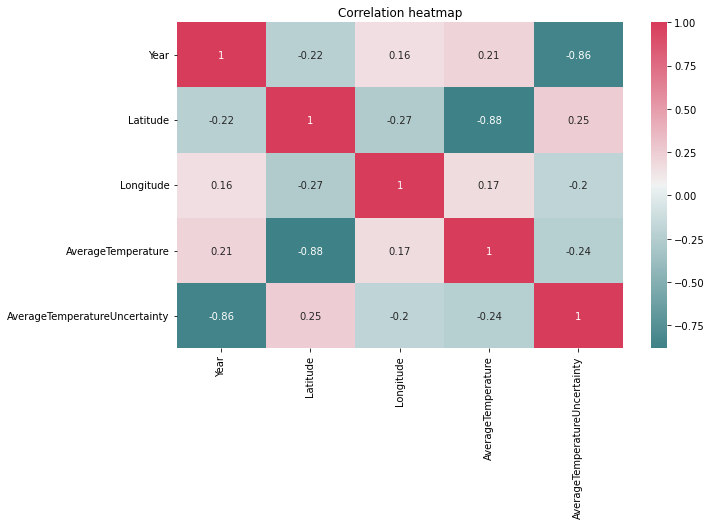

In [194]:
#Print correlation heatmap

corr = df.corr()
fig, ax = plt.subplots(figsize=(10,6)) 
cmap = sns.diverging_palette(200, 5, as_cmap=True)

sns.heatmap(corr, annot=True, cmap=cmap, ax=ax).set(
    title="Correlation heatmap")
plt.show()

We observe three things:
 - Year is negatively correlated with average temperature uncertainty. The lower the year, the higher the uncertainty. It makes sense as measurement techniques and recordings are more precise nowadays.
 - Latitude and average temperature are negatively correlated. It also makes sense as latitute is "a coordinate that specifies the north–south position of a point on the surface." *(source: Wikipedia)* Therefore, temperature decreases the more we go north.
 - Surprisingly, with a correlation coefficient of 0.21, average temperature and year do not seem correlated.
 
 Source: https://en.wikipedia.org/wiki/Latitude

## Plots

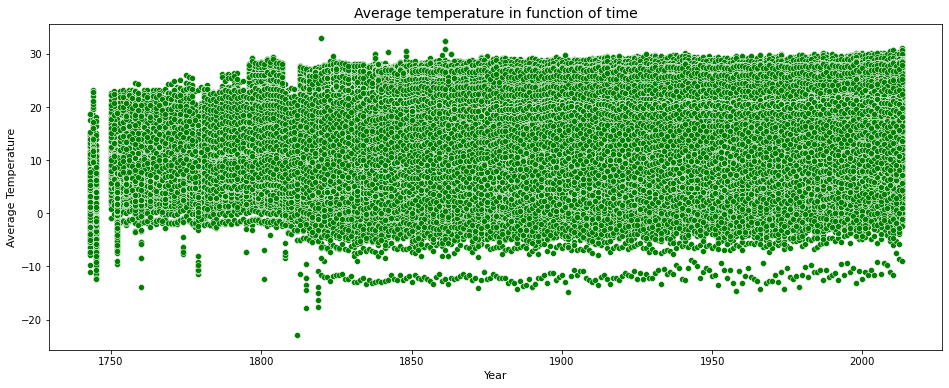

In [195]:
#Scatter plot

sns.scatterplot(x='Year',
            y='AverageTemperature', 
            data=df,
            color='green')

plt.xlabel("Year", size=11)
plt.ylabel("Average Temperature", size=11)
plt.title("Average temperature in function of time", size=14)
plt.show()

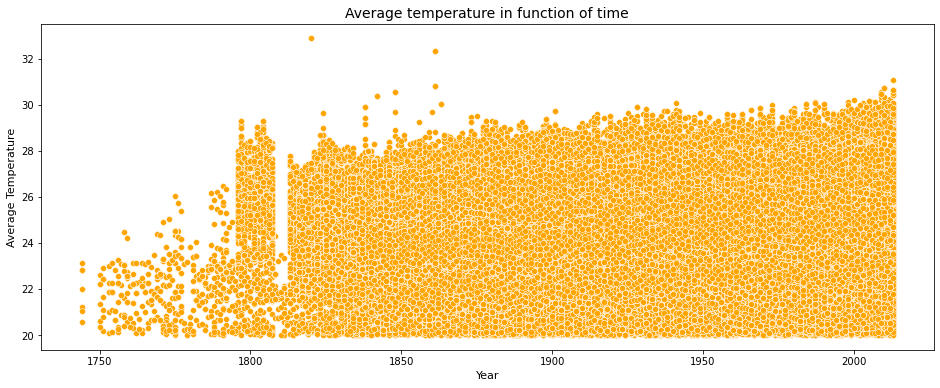

In [196]:
#Zoomed in scatter plot

flt = df[df['AverageTemperature'] > 20] 

sns.scatterplot(x='Year',
            y='AverageTemperature', 
            data=flt,
            color='orange')

plt.xlabel("Year", size=11)
plt.ylabel("Average Temperature", size=11)
plt.title("Average temperature in function of time", size=14)
plt.show()

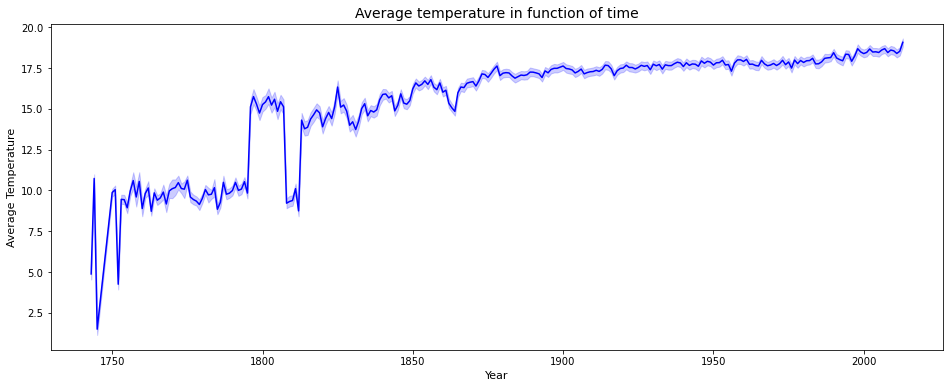

In [197]:
#Line plot

sns.lineplot(x='Year',
            y='AverageTemperature', 
            data=df,
            color='b')

#plt.fill_between(df.Year.values, df.AverageTemperature.values)
plt.xlabel("Year", size=11)
plt.ylabel("Average Temperature", size=11)
plt.title("Average temperature in function of time", size=14)
plt.show()

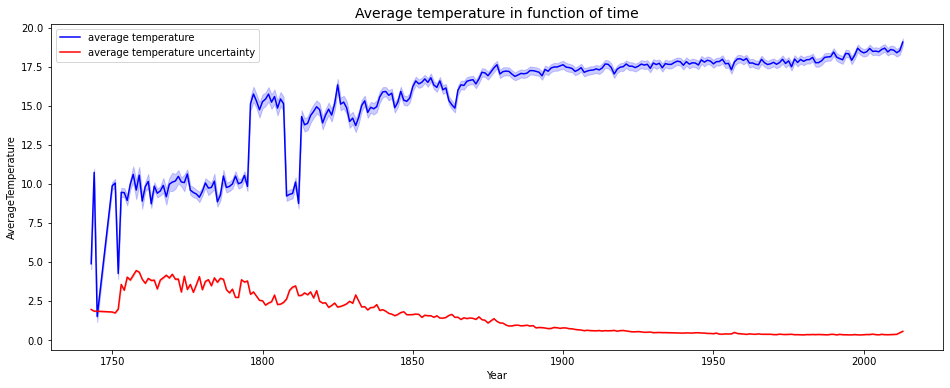

In [198]:
#Line plot 2

fig, ax = plt.subplots()
ax= sns.lineplot(x='Year', y='AverageTemperature', data=df, color='b', label= 'average temperature')
ax1 = sns.lineplot(x='Year', y='AverageTemperatureUncertainty', data=df, color='r', label= 'average temperature uncertainty')
plt.title("Average temperature in function of time", size=14)
plt.show()

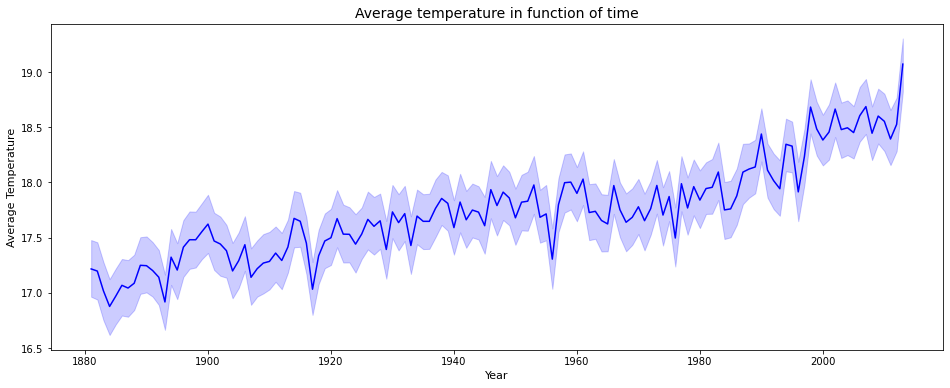

In [199]:
#Zoomed in line plot 1

flt1 = df[df['Year'] > 1880] 

sns.lineplot(x='Year',
            y='AverageTemperature', 
            data=flt1,
            color='blue')

plt.xlabel("Year", size=11)
plt.ylabel("Average Temperature", size=11)
plt.title("Average temperature in function of time", size=14)
plt.show()

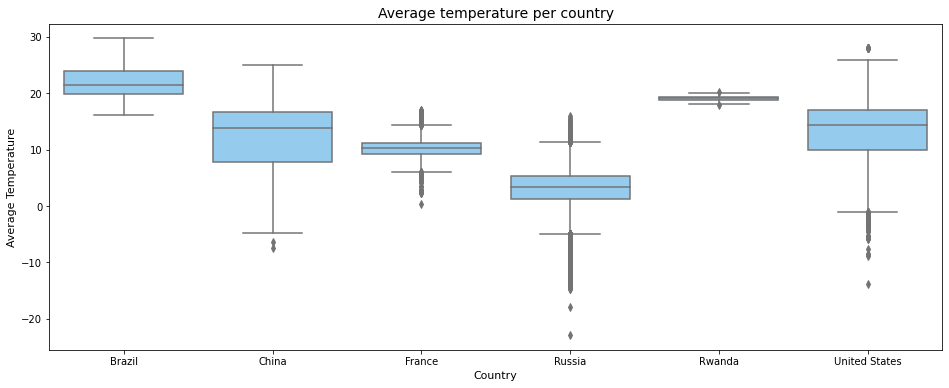

In [200]:
#Box plot

ctry = ['France', 'United States', 'Rwanda', 'China', 'Brazil', 'Russia']
dfctry = df[df['Country'].isin(ctry)]

sns.boxplot(data=dfctry, x='Country', y='AverageTemperature', color='lightskyblue')

plt.xlabel("Country", size=11)
plt.ylabel("Average Temperature", size=11)
plt.title("Average temperature per country", size=14)
plt.show()

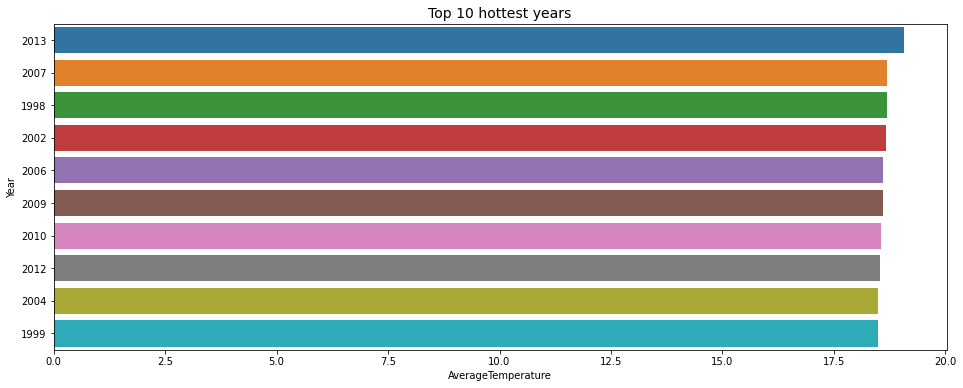

In [201]:
#Bar plot hottest years

h = df.groupby(['Year'], as_index=False)['AverageTemperature'].aggregate('mean')
ho = h.sort_values(by='AverageTemperature', ascending=False)
hot = ho.head(10)

sns.barplot(data=hot, x="AverageTemperature", y="Year", orient = 'h', order=hot.sort_values('AverageTemperature', ascending=False).Year)
plt.title("Top 10 hottest years", size=14)
plt.show()

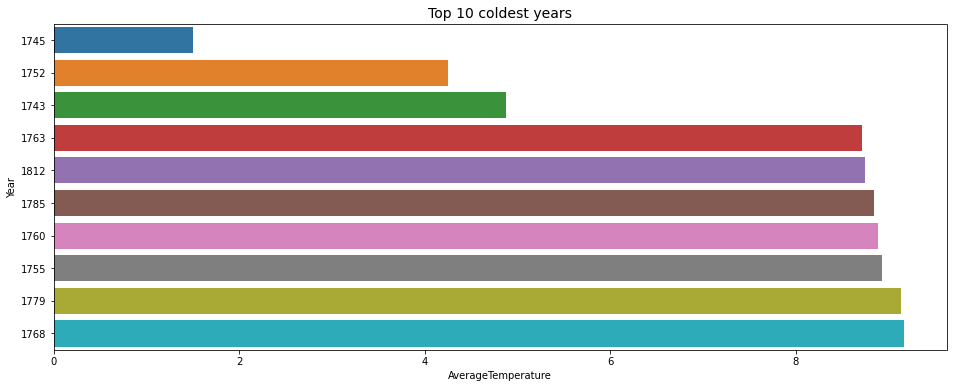

In [202]:
#Bar plot coldest years

co = h.sort_values(by='AverageTemperature', ascending=True)
cold = co.head(10)

sns.barplot(data=cold, x="AverageTemperature", y="Year", orient = 'h', order=cold.sort_values('AverageTemperature').Year)
plt.title("Top 10 coldest years", size=14)
plt.show()

We observe a few things:
 - Temperature increases pretty steadily from 1880 to 2013
 - 2013 (the last year in our data set) is the hottest of all. The 10 hottest years are all in the 21st century, except for 1998 and 1999 which belong to the late 20th century.
 - On the other hand, the top 10 coldest years are all in the 18th century (except for 1812).
 - There are fluctuations in temperature between 1743 and 1880, when the temperature uncertainty is the highest. This period of time corresponds to the little ice age: a period of cold winters and mild summers that affected Europe and North America between the 14th and 19th centuries *(source: Eos)*. Both temperature uncertainty and little ice age can explain these variations in temperatures.
 
Source: https://eos.org/articles/the-little-ice-age-wasnt-global-but-current-climate-change-is

## Adding a second dataset

To compare our data with other variables, we will include another dataset in our analysis. We chose to work with a dataset about **CO₂ and Greenhouse Gas Emissions worldwide**, as it is known that gas emissions have an impact on global warming. Data was collected by the University of Oxford and is available on the website 'our world in data'. It contains 4 columns:
 - Entity (i.e. Country)
 - Code (i.e. Country ISO code)
 - Year
 - Annual CO₂ emissions
 
Source: https://www.kaggle.com/datasets/programmerrdai/co-and-greenhouse-gas-emissions

In [203]:
#Loading dataset and converting it to a dataframe
import pandas as pd
b = pd.read_csv('/Users/akher/Downloads/annual-co-emissions-by-region.csv')
df2 = pd.DataFrame(b, index=None)

df2.head()

,Entity,Code,Year,Annual CO2 emissions (zero filled)
0,Afghanistan,AFG,1750,0
1,Afghanistan,AFG,1751,0
2,Afghanistan,AFG,1752,0
3,Afghanistan,AFG,1753,0
4,Afghanistan,AFG,1754,0


In [204]:
#Overview stats

df2.describe()

,Year,Annual CO2 emissions (zero filled)
count,66937.000000,6.693700e+04
mean,1885.000000,1.203917e+08
std,78.231013,1.030213e+09
min,1750.000000,0.000000e+00
25%,1817.000000,0.000000e+00
50%,1885.000000,0.000000e+00
75%,1953.000000,1.110879e+06
max,2020.000000,3.670250e+10


In [205]:
#Number of rows and columns

df2.shape

(66937, 4)

In [206]:
#List of countries

df2['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (excl. China & India)',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Gu

In [207]:
#Number of countries

df2['Entity'].nunique()

247

In [208]:
#Checking for null values

n0_rows = df2[df2.isnull().T.any()]

n0_rows

,Entity,Code,Year,Annual CO2 emissions (zero filled)
271,Africa,NaN,1750,0
272,Africa,NaN,1751,0
273,Africa,NaN,1752,0
274,Africa,NaN,1753,0
275,Africa,NaN,1754,0
...,...,...,...,...
64222,Upper-middle-income countries,NaN,2016,15218324779
64223,Upper-middle-income countries,NaN,2017,15495113052
64224,Upper-middle-income countries,NaN,2018,15888677256
64225,Upper-middle-income countries,NaN,2019,16054374312


In [209]:
#Removing null values

df2 = df2.dropna()

In [210]:
#Renaming columns

df2 = df2.rename({'Annual CO2 emissions (zero filled)': 'CO2'}, axis=1)
df2 = df2.rename({'Entity': 'Country'}, axis=1)
df2 = df2.rename({'Code': 'ISO'}, axis=1)
df2.head()

,Country,ISO,Year,CO2
0,Afghanistan,AFG,1750,0
1,Afghanistan,AFG,1751,0
2,Afghanistan,AFG,1752,0
3,Afghanistan,AFG,1753,0
4,Afghanistan,AFG,1754,0


In [211]:
#Getting rid of the 0s

df2 = df2[df2.CO2 > 0]

In [212]:
df2.head()

,Country,ISO,Year,CO2
199,Afghanistan,AFG,1949,14656
200,Afghanistan,AFG,1950,84272
201,Afghanistan,AFG,1951,91600
202,Afghanistan,AFG,1952,91600
203,Afghanistan,AFG,1953,106256


In [241]:
#Checking min and max values for CO2 and year

ymin1 = df2['Year'].min()
ymax1 = df2['Year'].max()
print("Minimun year is : "+ str(ymin1), " Maximum year is : "+str(ymax1))

cmin = df2['CO2'].min()
cmax = df2['CO2'].max()
print("Minimun CO2 emission is : "+ str(cmin), " Maximum CO2 emission is : "+str(cmax))

Minimun year is : 1750  Maximum year is : 2013
Minimun CO2 emission is : 34  Maximum CO2 emission is : 9952743755


In [214]:
#Reshaping both our dataframes to match in terms of years 

df2 = df2[df2.Year < 2014]

In [215]:
df2.head()

,Country,ISO,Year,CO2
199,Afghanistan,AFG,1949,14656
200,Afghanistan,AFG,1950,84272
201,Afghanistan,AFG,1951,91600
202,Afghanistan,AFG,1952,91600
203,Afghanistan,AFG,1953,106256


In [216]:
dff = df[df.Year > 1749]

dff

,Country,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
0,Afghanistan,Baglan,1833,36.17,69.61,10.404000,2.201917
1,Afghanistan,Baglan,1834,36.17,69.61,10.404000,2.176583
2,Afghanistan,Baglan,1835,36.17,69.61,11.521167,1.914000
4,Afghanistan,Baglan,1837,36.17,69.61,12.209833,2.127667
5,Afghanistan,Baglan,1838,36.17,69.61,9.649500,2.286833
...,...,...,...,...,...,...,...
718326,Zimbabwe,Mutare,2009,18.48,32.11,18.938667,0.537333
718327,Zimbabwe,Mutare,2010,18.48,32.11,19.515833,0.442333
718328,Zimbabwe,Mutare,2011,18.48,32.11,19.200583,0.502250
718329,Zimbabwe,Mutare,2012,18.48,32.11,18.874583,0.634417


In [217]:
#Reshaping df2 to match the countries of dff

df2 = df2.loc[df2['Country'].isin(['Afghanistan','Albania','Algeria','Angola','Argentina','Armenia','Australia','Austria','Azerbaijan','Bahamas','Bahrain',
'Bangladesh','Belarus','Belgium','Benin','Bolivia','Bosnia And Herzegovina','Botswana','Brazil','Bulgaria','Burkina Faso',
'Burma','Burundi','Cambodia','Cameroon','Canada','Central African Republic','Chad','Chile','China','Colombia','Congo',
'Congo (Democratic Republic Of The)','Costa Rica','Croatia','Cuba','Cyprus','Czech Republic',"Côte D'Ivoire",
'Denmark','Djibouti','Dominican Republic','Ecuador','Egypt','El Salvador','Equatorial Guinea','Eritrea','Estonia','Ethiopia',
'Finland','France','Gabon','Gambia','Georgia','Germany','Ghana','Greece','Guatemala','Guinea','Guinea Bissau',
'Guyana','Haiti','Honduras','Hong Kong','Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland','Israel',
'Italy','Jamaica','Japan','Jordan','Kazakhstan','Kenya','Laos','Latvia','Lebanon','Lesotho','Liberia','Libya',
'Lithuania','Macedonia','Madagascar','Malawi','Malaysia','Mali','Mauritania','Mauritus','Mexico','Moldova','Mongolia',
'Montenegro','Morocco','Mozambique','Namibia','Nepal','Netherlands','New Zealand','Nicaragua','Niger','Nigeria',
'Norway','Oman','Pakistan','Panama','Papua New Guinea','Paraguay','Peru','Philippines','Poland','Portugal','Puerto Rico',
'Qatar','Reunion','Romania','Russia','Rwanda','Saudi Arabia','Senegal','Serbia','Sierra Leone','Singapore',
'Slovakia','Slovenia','Somalia','South Africa','South Korea','Spain','Sri Lanka','Sudan','Suriname','Swaziland',
'Sweden','Switzerland','Syria','Taiwan','Tajikistan','Tanzania','Thailand','Togo','Tunisia','Turkey','Turkmenistan',
'Uganda','Ukraine','United Arab Emirates','United Kingdom','United States','Uruguay','Uzbekistan',
'Venezuela','Vietnam','Yemen','Zambia','Zimbabwe'])]

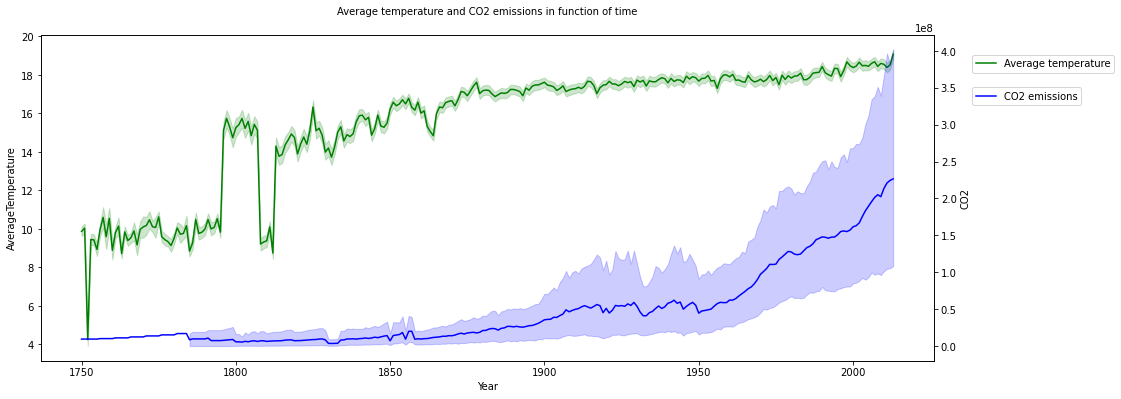

In [218]:
#Plotting average temperature and CO2 emissions in function of year

sns.lineplot(x='Year', y='AverageTemperature', data=dff, label= 'Average temperature', color="g")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)
ax2 = plt.twinx()
sns.lineplot(x='Year', y='CO2', data=df2, color='b', label= 'CO2 emissions')

plt.title("Average temperature and CO2 emissions in function of time", size=10, pad=20)
plt.legend(bbox_to_anchor=(1.02, 0.9), loc='upper left', borderaxespad=2)
plt.show()

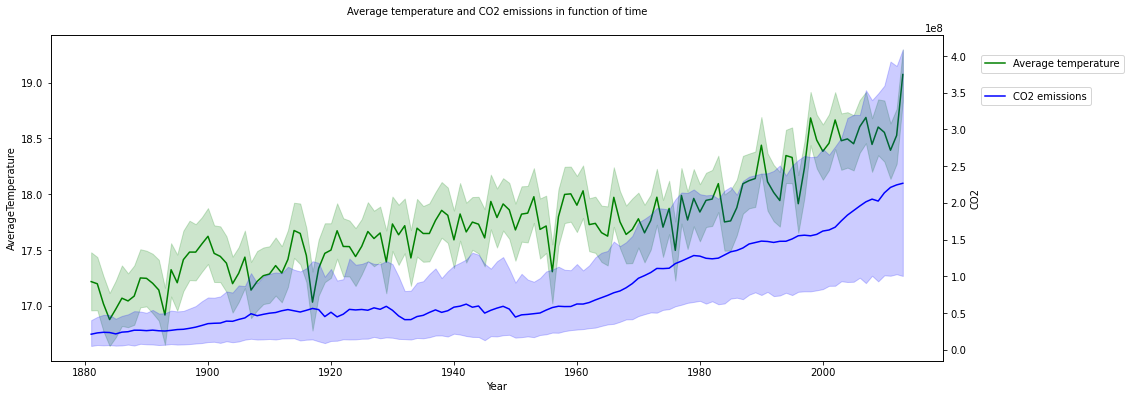

In [219]:
#Plotting average temperature and CO2 emissions in function of year (zoomed in)

fi = dff[dff['Year'] > 1880]
fil = df2[df2['Year'] > 1880]

sns.lineplot(x='Year', y='AverageTemperature', data=fi, label= 'Average temperature', color="g")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)
ax2 = plt.twinx()
sns.lineplot(x='Year', y='CO2', data=fil, color='b', label= 'CO2 emissions')

plt.title("Average temperature and CO2 emissions in function of time", size=10, pad=20)
plt.legend(bbox_to_anchor=(1.02, 0.9), loc='upper left', borderaxespad=2)
plt.show()

We observe that CO2 emissions and average temperature increase at the same pace over time.

In [220]:
#Merging our dataframes

b = dff.merge(df2, how='inner', left_on=['Country', 'Year'], right_on=['Country', 'Year'])

b

,Country,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,ISO,CO2
0,Afghanistan,Baglan,1949,36.17,69.61,10.317667,0.685083,AFG,14656
1,Afghanistan,Gardez,1949,32.95,69.89,17.278167,0.371083,AFG,14656
2,Afghanistan,Gazni,1949,32.95,67.98,10.063500,0.481167,AFG,14656
3,Afghanistan,Herat,1949,34.56,62.27,13.064833,0.795333,AFG,14656
4,Afghanistan,Jalalabad,1949,34.56,70.05,14.170750,0.525917,AFG,14656
...,...,...,...,...,...,...,...,...,...
461029,Zimbabwe,Gweru,2013,20.09,29.00,19.347500,0.843125,ZWE,11836254
461030,Zimbabwe,Harare,2013,18.48,30.42,19.756500,0.775250,ZWE,11836254
461031,Zimbabwe,Kadoma,2013,18.48,30.42,19.756500,0.775250,ZWE,11836254
461032,Zimbabwe,Kwekwe,2013,18.48,30.42,19.756500,0.775250,ZWE,11836254


In [221]:
#Checking for null values

n = b[b.isnull().T.any()]

n

,Country,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,ISO,CO2


## Adding a third dataset

To compare our data with other variables, we will include a third dataset in our analysis. We chose to work with a dataset about **worldwide population**, as this is another factor that has an impact on global warming. Data was collected by the world bank. It contains 3 columns:
 - Country Name
 - Year
 - Count (i.e. Population)

Source: https://www.kaggle.com/datasets/imdevskp/world-population-19602018?select=population_total_long.csv

In [222]:
#Loading dataset and converting it to a dataframe

import pandas as pd
c = pd.read_csv('/Users/akher/Downloads/population_total_long.csv.csv')
df3 = pd.DataFrame(c, index=None)

df3.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [223]:
#Overview stats

df3.describe()

,Year,Count
count,12595.000000,1.259500e+04
mean,1988.583406,2.377748e+07
std,16.744033,1.002442e+08
min,1960.000000,3.893000e+03
25%,1974.000000,4.758955e+05
50%,1989.000000,4.060260e+06
75%,2003.000000,1.276995e+07
max,2017.000000,1.386395e+09


In [224]:
#Number of rows and columns

df3.shape

(12595, 3)

In [225]:
#Number of countries

df3['Country Name'].nunique()

219

In [226]:
#Renaming columns

df3 = df3.rename({'Count': 'Population'}, axis=1)
df3 = df3.rename({'Country Name': 'Country'}, axis=1)
df3.head()

,Country,Year,Population
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [227]:
#Checking for null values

df3n = df3[df3.isnull().T.any()]

df3n

,Country,Year,Population


In [228]:
#Checking min and max values for year and population

ymin2 = df3['Year'].min()
ymax2 = df3['Year'].max()
print("Minimun year is : "+ str(ymin2), " Maximum year is : "+str(ymax2))

pmin = df3['Population'].min()
pmax = df3['Population'].max()
print("Minimun population is : "+ str(pmin), " Maximum population is : "+str(pmax))

Minimun year is : 1960  Maximum year is : 2017
Minimun population is : 3893  Maximum population is : 1386395000


In [229]:
#Reshaping df3 to match the countries of dff

df3 = df3.loc[df3['Country'].isin(['Afghanistan','Albania','Algeria','Angola','Argentina','Armenia','Australia','Austria','Azerbaijan','Bahamas','Bahrain',
'Bangladesh','Belarus','Belgium','Benin','Bolivia','Bosnia And Herzegovina','Botswana','Brazil','Bulgaria','Burkina Faso',
'Burma','Burundi','Cambodia','Cameroon','Canada','Central African Republic','Chad','Chile','China','Colombia','Congo',
'Congo (Democratic Republic Of The)','Costa Rica','Croatia','Cuba','Cyprus','Czech Republic',"Côte D'Ivoire",
'Denmark','Djibouti','Dominican Republic','Ecuador','Egypt','El Salvador','Equatorial Guinea','Eritrea','Estonia','Ethiopia',
'Finland','France','Gabon','Gambia','Georgia','Germany','Ghana','Greece','Guatemala','Guinea','Guinea Bissau',
'Guyana','Haiti','Honduras','Hong Kong','Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland','Israel',
'Italy','Jamaica','Japan','Jordan','Kazakhstan','Kenya','Laos','Latvia','Lebanon','Lesotho','Liberia','Libya',
'Lithuania','Macedonia','Madagascar','Malawi','Malaysia','Mali','Mauritania','Mauritus','Mexico','Moldova','Mongolia',
'Montenegro','Morocco','Mozambique','Namibia','Nepal','Netherlands','New Zealand','Nicaragua','Niger','Nigeria',
'Norway','Oman','Pakistan','Panama','Papua New Guinea','Paraguay','Peru','Philippines','Poland','Portugal','Puerto Rico',
'Qatar','Reunion','Romania','Russia','Rwanda','Saudi Arabia','Senegal','Serbia','Sierra Leone','Singapore',
'Slovakia','Slovenia','Somalia','South Africa','South Korea','Spain','Sri Lanka','Sudan','Suriname','Swaziland',
'Sweden','Switzerland','Syria','Taiwan','Tajikistan','Tanzania','Thailand','Togo','Tunisia','Turkey','Turkmenistan',
'Uganda','Ukraine','United Arab Emirates','United Kingdom','United States','Uruguay','Uzbekistan',
'Venezuela','Vietnam','Yemen','Zambia','Zimbabwe'])]

In [230]:
#Merge our dataframes

b = b.merge(df3, how='inner', left_on=['Country', 'Year'], right_on=['Country', 'Year'])

b

,Country,City,Year,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,ISO,CO2,Population
0,Afghanistan,Baglan,1960,36.17,69.61,10.846250,0.659000,AFG,413885,8996973
1,Afghanistan,Gardez,1960,32.95,69.89,17.439833,0.450667,AFG,413885,8996973
2,Afghanistan,Gazni,1960,32.95,67.98,10.484917,0.641833,AFG,413885,8996973
3,Afghanistan,Herat,1960,34.56,62.27,14.020250,0.633917,AFG,413885,8996973
4,Afghanistan,Jalalabad,1960,34.56,70.05,14.543667,0.518417,AFG,413885,8996973
...,...,...,...,...,...,...,...,...,...,...
167426,Zimbabwe,Gweru,2013,20.09,29.00,19.347500,0.843125,ZWE,11836254,13350356
167427,Zimbabwe,Harare,2013,18.48,30.42,19.756500,0.775250,ZWE,11836254,13350356
167428,Zimbabwe,Kadoma,2013,18.48,30.42,19.756500,0.775250,ZWE,11836254,13350356
167429,Zimbabwe,Kwekwe,2013,18.48,30.42,19.756500,0.775250,ZWE,11836254,13350356


## Multivariate plotting

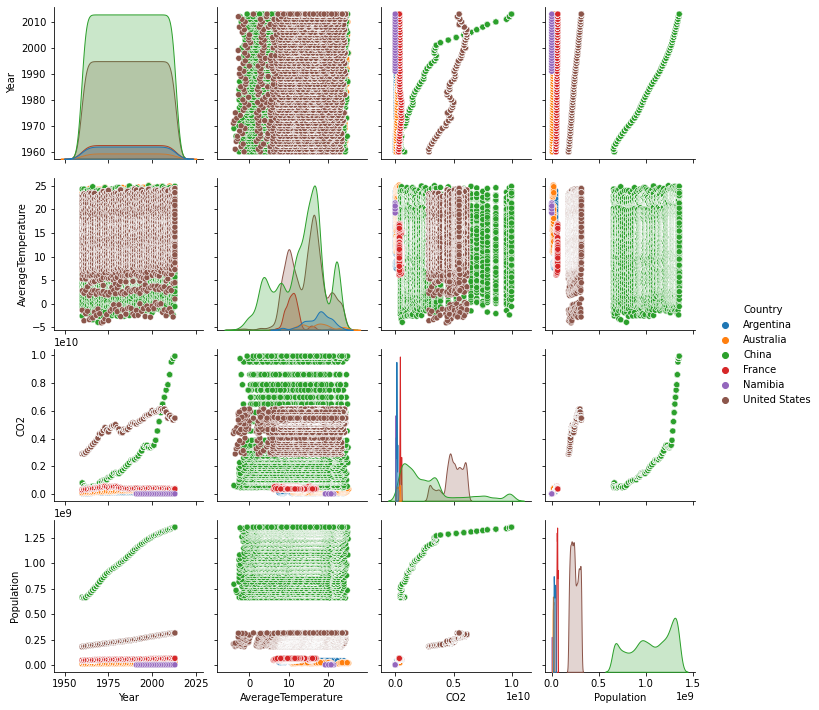

In [231]:
#Pair plot for a selection of countries

pp = b.loc[b['Country'].isin(['Namibia','United States', 'Argentina', 'France', 'China', 'Russia', 'Australia'])]
pp = pp.drop(['Latitude', 'Longitude', 'AverageTemperatureUncertainty'], axis=1)

sns.pairplot(pp, hue="Country")

In [232]:
pp.corr()

,Year,AverageTemperature,CO2,Population
Year,1.000000,0.063148,0.629906,0.280328
AverageTemperature,0.063148,1.000000,0.061242,-0.102226
CO2,0.629906,0.061242,1.000000,0.158341
Population,0.280328,-0.102226,0.158341,1.000000


Looking at the pair plot, we could think that average population and CO2 are correlated. However, the correlation matrix above shows us otherwise. The only variables that are correlated are Year and CO2 emissions: emissions increases in function of time.

In [233]:
#Agreggate measures

t6 = b.loc[b['Year'] == 1960, 'AverageTemperature'].mean()
t7 = b.loc[b['Year'] == 1970, 'AverageTemperature'].mean() 
t8 = b.loc[b['Year'] == 1980, 'AverageTemperature'].mean()
t9 = b.loc[b['Year'] == 1990, 'AverageTemperature'].mean()
t0 = b.loc[b['Year'] == 2000, 'AverageTemperature'].mean()
t1 = b.loc[b['Year'] == 2010, 'AverageTemperature'].mean()

c6 = b.loc[b['Year'] == 1960, 'CO2'].mean()
c7 = b.loc[b['Year'] == 1970, 'CO2'].mean() 
c8 = b.loc[b['Year'] == 1980, 'CO2'].mean()
c9 = b.loc[b['Year'] == 1990, 'CO2'].mean()
c0 = b.loc[b['Year'] == 2000, 'CO2'].mean()
c1 = b.loc[b['Year'] == 2010, 'CO2'].mean()

p6 = b.loc[b['Year'] == 1960, 'Population'].mean()
p7 = b.loc[b['Year'] == 1970, 'Population'].mean() 
p8 = b.loc[b['Year'] == 1980, 'Population'].mean()
p9 = b.loc[b['Year'] == 1990, 'Population'].mean()
p0 = b.loc[b['Year'] == 2000, 'Population'].mean()
p1 = b.loc[b['Year'] == 2010, 'Population'].mean()

print(p1)

406232075.3667096


In [234]:
#Create new dataframe

c = pd.DataFrame({'Year': [1960, 1970, 1980, 1990, 2000, 2010],
                   'Temperature': [18.4, 18.26, 18.35, 18.9, 18.84, 18.96],
                   'CO2': [424674979, 612711568, 788851686, 990466982, 1254781561, 1969454168],
                   'Pop': [181146375, 221020965, 267862373, 317298624, 365514482, 406232075]})

c

,Year,Temperature,CO2,Pop
0,1960,18.40,424674979,181146375
1,1970,18.26,612711568,221020965
2,1980,18.35,788851686,267862373
3,1990,18.90,990466982,317298624
4,2000,18.84,1254781561,365514482
5,2010,18.96,1969454168,406232075


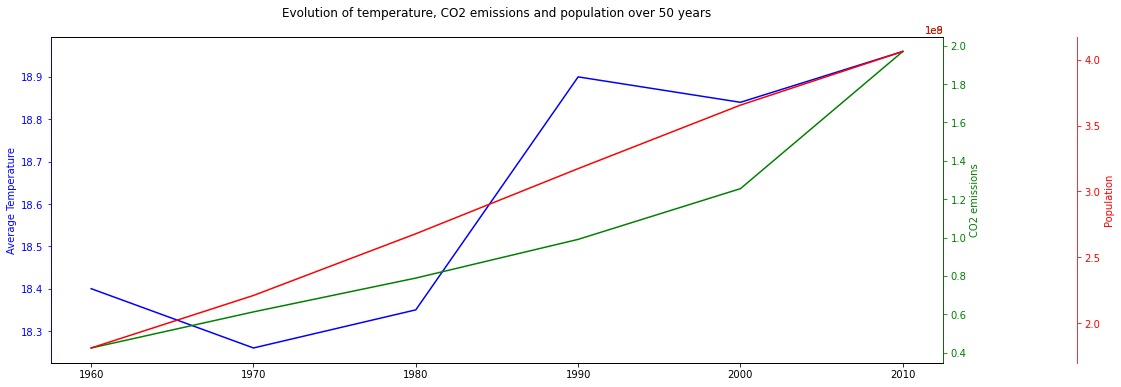

In [235]:
#Plotting average temperature, average population and average CO2 emissions

fig, ax1 = plt.subplots()

year = c['Year']
temp = c['Temperature']
co2 = c['CO2']
pop = c['Pop']

ax1.plot(year,temp,color="blue")

ax2 = ax1.twinx()
ax2.plot(year,co2,color="green")

ax3 = ax1.twinx()
ax3.plot(year,pop,color="red")
#ax3.spines['right'].set_position(('outward',60))
ax3.spines['right'].set_position(('axes',1.15))

ax1.set_ylabel("Average Temperature",color="blue")
ax2.set_ylabel("CO2 emissions",color="green")
ax3.set_ylabel("Population",color="red")

ax1.tick_params(axis='y',colors="blue")
ax2.tick_params(axis='y',colors="green")
ax3.tick_params(axis='y',colors="red")

ax2.spines['right'].set_color("green")
ax3.spines['right'].set_color("red")
ax3.spines['left'].set_color("blue")

plt.title("Evolution of temperature, CO2 emissions and population over 50 years", size=12, pad=20)
plt.show()

We observe the following:
 - Population grows in a linear way.
 - CO2 emissions increase linearly until 2000, and then grow at a faster pace.
 - The temperature fluctuates even though the general trend is increasing. The fluctuations can be explained by the fact that we only used 6 data points to build the plot. Moreover, even if the fluctuations seem quite large, they remain in the order of less than one degree Celsius.

## Plotting by country

In [236]:
#Filtering for year 2013

pl = b.loc[b['Year'] == 2013]

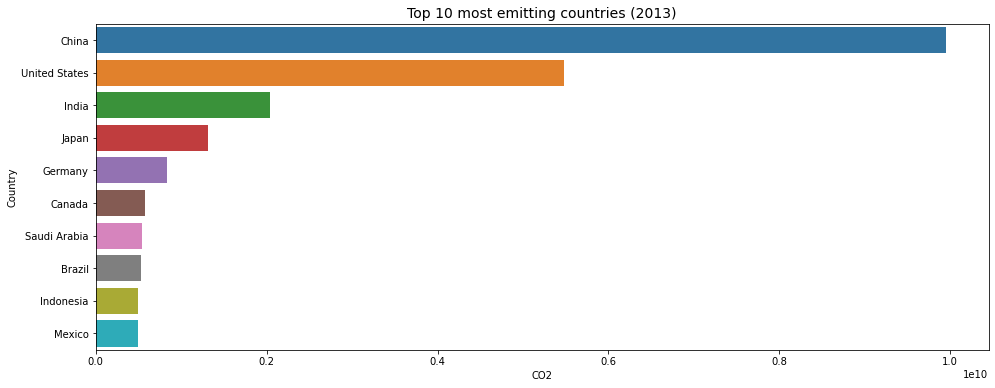

In [237]:
#Bar plot top 10 most emitting countries 2013

e = pl.groupby(['Country'], as_index=False)['CO2'].aggregate('mean')
em = e.sort_values(by='CO2', ascending=False)
emi = em.head(10)

sns.barplot(data=emi, x="CO2", y="Country", orient = 'h', order=emi.sort_values('CO2', ascending=False).Country)
plt.title("Top 10 most emitting countries (2013)", size=14)
plt.show()

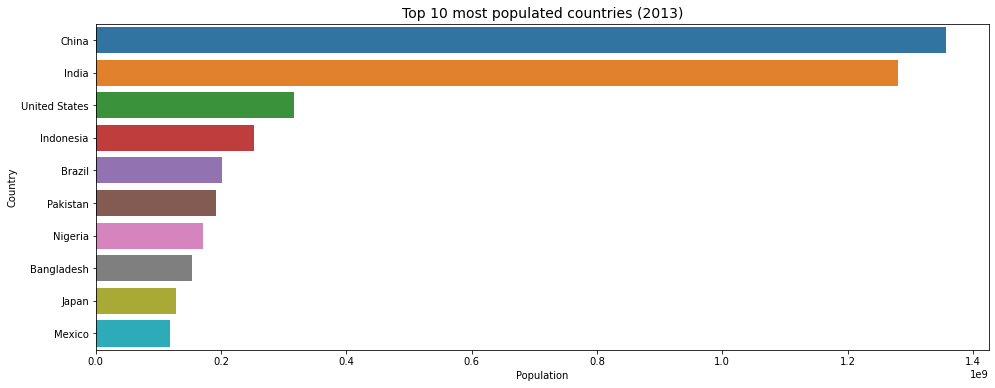

In [238]:
#Bar plot top 10 most populated countries 2013

e = pl.groupby(['Country'], as_index=False)['Population'].aggregate('mean')
em = e.sort_values(by='Population', ascending=False)
emi = em.head(10)

sns.barplot(data=emi, x="Population", y="Country", orient = 'h', order=emi.sort_values('Population', ascending=False).Country)
plt.title("Top 10 most populated countries (2013)", size=14)
plt.show()

The top 3 most CO2 emitting countries are the same as the most populated ones. However, it does not mean that these two variables are correlated, as the correlation matrix showed.

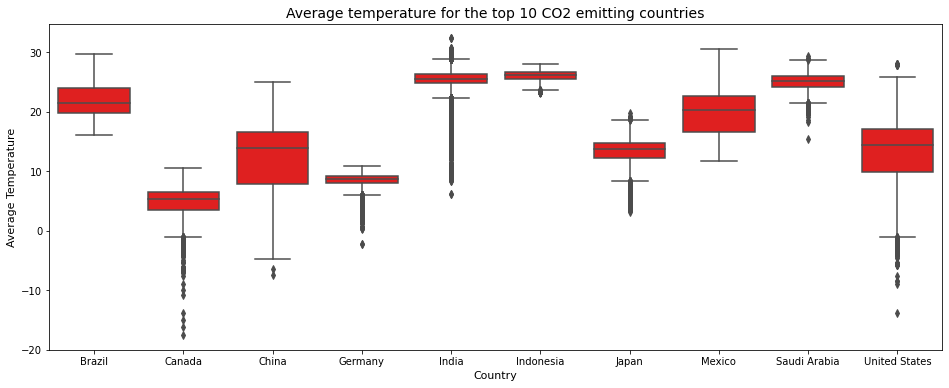

In [239]:
#Box plot of average temperature for the top 10 CO2 emitting countries

ctry1 = ['China', 'United States', 'India', 'Japan', 'Germany', 'Canada', 'Saudi Arabia', 'Brazil', 'Indonesia', 'Mexico']
dfctry1 = df[df['Country'].isin(ctry1)]

sns.boxplot(data=dfctry1, x='Country', y='AverageTemperature', color='red')

plt.xlabel("Country", size=11)
plt.ylabel("Average Temperature", size=11)
plt.title("Average temperature for the top 10 CO2 emitting countries", size=14)
plt.show()

The distribution of values is rather large for the first two most CO2 emitting countries (China and the United States). However, this is not the case for India, which is 3rd. Therefore, the large distribution of values for the United States and China can be explained by the fact that they are big countries with varied landscapes (desert and mountains) with important temperature variations depending on the location.

## Conclusion

To conclude, average temperature worldwide is increasing as well as population and gas emissions. Although our analysis does not demonstrate a clear correlation between these variables, it does demonstrate an absolute truth: these numbers do not bode well for the future of our planet. The results of our analysis confirms what scientists are saying for decades. It is now urgent for our governments to take actions in the interest of humanity. According to scientists, we have 9 years to avert catastrophic warming *(source: The Washington Post)*. 

This analysis raises a few questions:
 - Is there a third or fourth variable linking population and CO2 emissions ?
 - Is industrial activity correlated with temperature and CO2 emissions?
 - Is the temperature growth percentage correlated with population?
 
I also think it would be interesting to study the characteristics of countries that have a low percentage of temperature increase as well as low CO2 emissions. This could potentially reveal characteristics and patterns that could be applied to the rest of the world to combat climate change.

Source: https://www.washingtonpost.com/climate-environment/2022/11/11/cop27-egypt-carbon-budget-gas-projects/

In [242]:
#Saving dataframe to use it in Tableau

b.to_csv(r'C:\Users\akher\Documents\datab.csv')